# JanataHack: HR Analytics

[https://datahack.analyticsvidhya.com/contest/janatahack-hr-analytics/](https://datahack.analyticsvidhya.com/contest/janatahack-hr-analytics/)

## Problem Statement

A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.
 
To understand the factors that lead a person to look for a job change, **the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.**


## Data Dictionary


* enrollee_id -> Unique ID for enrollee

* city -> City code

* city_development_index -> Developement index of the city (scaled)

* gender -> Gender

* relevent_experience -> Relevent experience

* enrolled_university -> Type of University course enrolled if any

* education_level -> Education level

* major_discipline -> Major discipline

* experience -> Total experience in years

* company_size -> No of employees in current employer's company

* company_type -> Type of current employer

* last_new_job -> Difference in years between previous job and current job

* training_hours -> training hours completed

* target -> 0 – Not looking for job change, 1 – Looking for a job change



### Importing packages

In [1]:
import pandas as pd 
import os
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score

### Setting Working Directory

In [61]:
os.chdir(r"C:\Users\D3\Desktop\Machine Learning\Datasets")

# TRAINING DATA

### Importing the data

In [62]:
data = pd.read_csv("Hr_train.csv")

### viewing the data and it's column's

In [63]:
print(data.columns)
data.head()

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


### viewing the missing values

In [64]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

*Here 8 columns have an missing values so we have to remove all the null values*

In [65]:
data.dropna(how='any',inplace=True)

In [66]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [67]:
data.shape

(9287, 14)

In [68]:
print ("Unique values : \n", data.nunique())

Unique values : 
 enrollee_id               9287
city                       115
city_development_index      90
gender                       3
relevent_experience          2
enrolled_university          3
education_level              3
major_discipline             6
experience                  22
company_size                 8
company_type                 6
last_new_job                 6
training_hours             241
target                       2
dtype: int64


### Data struture

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9287 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             9287 non-null   int64  
 1   city                    9287 non-null   object 
 2   city_development_index  9287 non-null   float64
 3   gender                  9287 non-null   object 
 4   relevent_experience     9287 non-null   object 
 5   enrolled_university     9287 non-null   object 
 6   education_level         9287 non-null   object 
 7   major_discipline        9287 non-null   object 
 8   experience              9287 non-null   object 
 9   company_size            9287 non-null   object 
 10  company_type            9287 non-null   object 
 11  last_new_job            9287 non-null   object 
 12  training_hours          9287 non-null   int64  
 13  target                  9287 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory u

In [70]:
data = data.drop(["enrollee_id", "city"], axis=1)

### Initialize MinMaxScaler

In [71]:
scaler = MinMaxScaler()

# Fit and transform the data
data['training_hours'] = scaler.fit_transform(data[['training_hours']])

data["training_hours"] = data['training_hours'].round(2)

data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,0.31,0
1,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,0.20,0
3,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,0.07,0
5,0.624,Female,Has relevent experience,no_enrollment,Graduate,Other,8,5000-9999,Pvt Ltd,2,0.10,0
6,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,10000+,Pvt Ltd,3,0.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18354,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,0.21,0
18355,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,0.47,0
18356,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,0.05,0
18357,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,0.12,0


### converting non numerical column to numerical column

In [72]:
data = pd.get_dummies(data)
data.head()

,city_development_index,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.689,0.31,0,False,True,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,0.923,0.20,0,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.666,0.07,0,False,True,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
5,0.624,0.10,0,True,False,False,True,False,False,False,...,False,False,False,True,False,True,False,False,False,False
6,0.624,0.07,1,False,True,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [73]:
data.columns

Index(['city_development_index', 'training_hours', 'target', 'gender_Female',
       'gender_Male', 'gender_Other',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Graduate',
       'education_level_Masters', 'education_level_Phd',
       'major_discipline_Arts', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM', 'experience_1',
       'experience_10', 'experience_11', 'experience_12', 'experience_13',
       'experience_14', 'experience_15', 'experience_16', 'experience_17',
       'experience_18', 'experience_19', 'experience_2', 'experience_20',
       'experience_3', 'experience_4', 'experience_5', 'experience_6',
       'experience_7', 'experience_8', 'experience

In [74]:
col_name =[ 'gender_Female',
       'gender_Male', 'gender_Other',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Graduate',
       'education_level_Masters', 'education_level_Phd',
       'major_discipline_Arts', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM', 'experience_1',
       'experience_10', 'experience_11', 'experience_12', 'experience_13',
       'experience_14', 'experience_15', 'experience_16', 'experience_17',
       'experience_18', 'experience_19', 'experience_2', 'experience_20',
       'experience_3', 'experience_4', 'experience_5', 'experience_6',
       'experience_7', 'experience_8', 'experience_9', 'experience_<1',
       'experience_>20', 'company_size_10/49', 'company_size_100-500',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_50-99',
       'company_size_500-999', 'company_size_5000-9999', 'company_size_<10',
       'company_type_Early Stage Startup', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_1', 'last_new_job_2',
       'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never']

In [75]:
import pandas as pd

def convert_column_to_int(dataframe, column_name):
    """
    Convert the datatype of a column in a DataFrame to integer.
    """
    try:
        dataframe[column_name] = dataframe[column_name].astype(int)
        return dataframe
    except ValueError:
        print("Conversion failed. Check if the column contains non-integer values.")

# Example usage:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to convert
# df = convert_column_to_int(df, 'column_name')


In [76]:
convert_column_to_int(data,col_name)

,city_development_index,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.689,0.31,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0.923,0.20,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.666,0.07,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5,0.624,0.10,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6,0.624,0.07,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,0.920,0.21,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
18355,0.920,0.47,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
18356,0.926,0.05,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
18357,0.939,0.12,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [77]:
feature_name=[str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace('+', '').replace('-', '').replace('/', '') for col in data.columns]
data.columns= feature_name

In [78]:
# Remove duplicated column names
data = data.loc[:, ~data.columns.duplicated()]

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9287 entries, 0 to 18358
Data columns (total 59 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city_development_index                       9287 non-null   float64
 1   training_hours                               9287 non-null   float64
 2   target                                       9287 non-null   int64  
 3   gender_Female                                9287 non-null   int32  
 4   gender_Male                                  9287 non-null   int32  
 5   gender_Other                                 9287 non-null   int32  
 6   relevent_experience_Has relevent experience  9287 non-null   int32  
 7   relevent_experience_No relevent experience   9287 non-null   int32  
 8   enrolled_university_Full time course         9287 non-null   int32  
 9   enrolled_university_Part time course         9287 non-null   int32  
 10  enro

In [21]:
#Splitting the data into features and target variable
X = data.drop(['target'],axis=1) # Features
y = data.iloc[:,2:3]   # Target variable

In [22]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
# Defining the XGBoost model
model = xgb.XGBClassifier()

In [24]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score# Load the Iris


param_grid = {
    "learning_rate": [0.07,0.08],
              "max_depth": [1,2,3],
              "n_estimators": [10,20,30,40,50],
              "subsample": [0.5,0.6],
              "min_samples_split": range(12,16),
              "min_samples_leaf" : range(14,19),
              "max_features":[7,10,13]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,n_jobs=-1, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'learning_rate': 0.07, 'max_depth': 2, 'max_features': 7, 'min_samples_leaf': 14, 'min_samples_split': 12, 'n_estimators': 40, 'subsample': 0.5}
Best Score: 0.8925831163125091
Test Accuracy: 0.8966630785791173


In [25]:
params = {'learning_rate': 0.07, 'max_depth': 2, 'max_features': 7, 'min_samples_leaf': 14, 'min_samples_split': 12, 'n_estimators': 40, 'subsample': 0.5}

In [26]:
# Defining the XGBoost model
model = xgb.XGBClassifier(**params)

In [27]:
# Training the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_features=7, max_leaves=None,
              min_child_weight=None, min_samples_leaf=14, min_samples_split=12,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=40, ...)

In [28]:
y_pred_train = model.predict(X_train) 
# Calculating accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)

Accuracy: 0.8924485125858124


In [29]:
# Making predictions
y_pred = model.predict(X_test)

In [30]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8966630785791173


In [31]:
# Calculating ROC-AUC score
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.6759750775310124


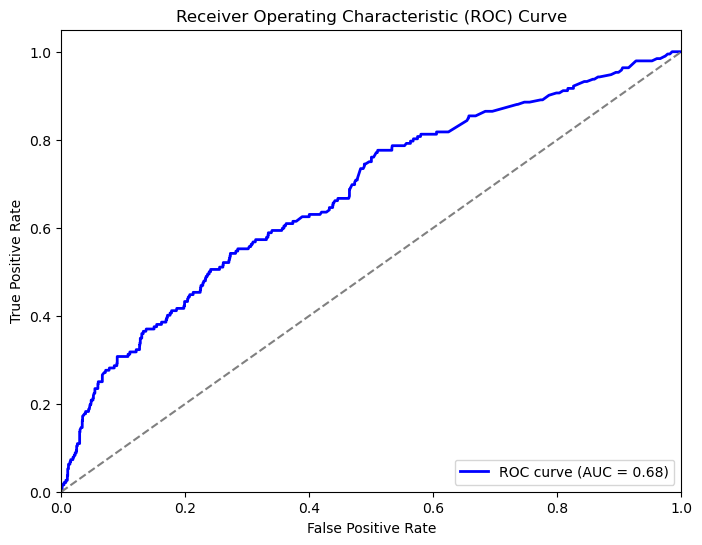

In [32]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Testing Data

In [80]:
df = pd.read_csv("Hr_test.csv")

In [81]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,city_46,0.762,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,68
15017,14612,city_21,0.624,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320
15018,33346,city_16,0.910,Male,Has relevent experience,no_enrollment,High School,NaN,9,1000-4999,Pvt Ltd,4,13
15019,14506,city_64,0.666,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,38


In [82]:
print(df.columns)
df.head()

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


### viewing the missing values

In [83]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

*Here 8 columns have an missing values so we have to remove all the null values*

In [84]:
df.dropna(how='any',inplace=True)

In [85]:
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [86]:
df.shape

(7440, 13)

In [87]:
print ("Unique values : \n", df.nunique())

Unique values : 
 enrollee_id               7440
city                       113
city_development_index      87
gender                       3
relevent_experience          2
enrolled_university          3
education_level              3
major_discipline             6
experience                  22
company_size                 8
company_type                 6
last_new_job                 6
training_hours             240
dtype: int64


### Data struture

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7440 entries, 1 to 15017
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             7440 non-null   int64  
 1   city                    7440 non-null   object 
 2   city_development_index  7440 non-null   float64
 3   gender                  7440 non-null   object 
 4   relevent_experience     7440 non-null   object 
 5   enrolled_university     7440 non-null   object 
 6   education_level         7440 non-null   object 
 7   major_discipline        7440 non-null   object 
 8   experience              7440 non-null   object 
 9   company_size            7440 non-null   object 
 10  company_type            7440 non-null   object 
 11  last_new_job            7440 non-null   object 
 12  training_hours          7440 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 813.8+ KB


In [89]:
df = df.drop(["enrollee_id", "city"], axis=1)

### Initialize MinMaxScaler

In [90]:
scaler = MinMaxScaler()

# Fit and transform the data
df['training_hours'] = scaler.fit_transform(df[['training_hours']])

df["training_hours"] = df['training_hours'].round(2)

df

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,0.28
3,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,0.22
4,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,0.19
5,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,100-500,Pvt Ltd,2,0.10
6,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,10000+,Pvt Ltd,1,0.14
...,...,...,...,...,...,...,...,...,...,...,...
15006,0.754,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Pvt Ltd,1,0.24
15010,0.899,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,5000-9999,Pvt Ltd,>4,0.47
15012,0.920,Male,Has relevent experience,no_enrollment,Phd,STEM,>20,10000+,Pvt Ltd,4,0.25
15015,0.878,Male,Has relevent experience,no_enrollment,Masters,STEM,5,100-500,Pvt Ltd,1,0.01


### converting non numerical column to numerical column

In [91]:
df = pd.get_dummies(df)
df.head()

,city_development_index,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,0.939,0.28,False,True,False,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
3,0.924,0.22,False,True,False,False,True,False,False,True,...,False,False,False,True,False,True,False,False,False,False
4,0.830,0.19,False,True,False,True,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False
5,0.920,0.10,False,True,False,True,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False
6,0.624,0.14,False,True,False,True,False,False,False,True,...,False,False,False,True,True,False,False,False,False,False


In [92]:
df.columns

Index(['city_development_index', 'training_hours', 'gender_Female',
       'gender_Male', 'gender_Other',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Graduate',
       'education_level_Masters', 'education_level_Phd',
       'major_discipline_Arts', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM', 'experience_1',
       'experience_10', 'experience_11', 'experience_12', 'experience_13',
       'experience_14', 'experience_15', 'experience_16', 'experience_17',
       'experience_18', 'experience_19', 'experience_2', 'experience_20',
       'experience_3', 'experience_4', 'experience_5', 'experience_6',
       'experience_7', 'experience_8', 'experience_9', 'expe

In [93]:
col_name =['gender_Female',
       'gender_Male', 'gender_Other',
       'relevent_experience_Has relevent experience',
       'relevent_experience_No relevent experience',
       'enrolled_university_Full time course',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Graduate',
       'education_level_Masters', 'education_level_Phd',
       'major_discipline_Arts', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM', 'experience_1',
       'experience_10', 'experience_11', 'experience_12', 'experience_13',
       'experience_14', 'experience_15', 'experience_16', 'experience_17',
       'experience_18', 'experience_19', 'experience_2', 'experience_20',
       'experience_3', 'experience_4', 'experience_5', 'experience_6',
       'experience_7', 'experience_8', 'experience_9', 'experience_<1',
       'experience_>20', 'company_size_10/49', 'company_size_100-500',
       'company_size_1000-4999', 'company_size_10000+', 'company_size_50-99',
       'company_size_500-999', 'company_size_5000-9999', 'company_size_<10',
       'company_type_Early Stage Startup', 'company_type_Funded Startup',
       'company_type_NGO', 'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_1', 'last_new_job_2',
       'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never']

In [94]:
import pandas as pd

def convert_column_to_int(dataframe, column_name):
    """
    Convert the datatype of a column in a DataFrame to integer.
    """
    try:
        dataframe[column_name] = dataframe[column_name].astype(int)
        return dataframe
    except ValueError:
        print("Conversion failed. Check if the column contains non-integer values.")

# Example usage:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to convert
# df = convert_column_to_int(df, 'column_name')


In [95]:
convert_column_to_int(df,col_name)

,city_development_index,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,0.939,0.28,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0.924,0.22,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,0.830,0.19,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
5,0.920,0.10,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
6,0.624,0.14,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15006,0.754,0.24,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15010,0.899,0.47,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
15012,0.920,0.25,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
15015,0.878,0.01,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0


In [96]:
feature_name=[str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '').replace('+', '').replace('-', '').replace('/', '') for col in df.columns]
df.columns= feature_name

In [97]:
# Remove duplicated column names
df = df.loc[:, ~df.columns.duplicated()]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7440 entries, 1 to 15017
Data columns (total 58 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   city_development_index                       7440 non-null   float64
 1   training_hours                               7440 non-null   float64
 2   gender_Female                                7440 non-null   int32  
 3   gender_Male                                  7440 non-null   int32  
 4   gender_Other                                 7440 non-null   int32  
 5   relevent_experience_Has relevent experience  7440 non-null   int32  
 6   relevent_experience_No relevent experience   7440 non-null   int32  
 7   enrolled_university_Full time course         7440 non-null   int32  
 8   enrolled_university_Part time course         7440 non-null   int32  
 9   enrolled_university_no_enrollment            7440 non-null   int32  
 10  educ

In [59]:
#Splitting the data into features and target variable
X = data.drop(['target'],axis=1)# Features
y = df.iloc[:,2:3]   # Target variable

In [60]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

ValueError: Found input variables with inconsistent numbers of samples: [9287, 7440]

In [ ]:
# Defining the XGBoost model
model = xgb.XGBClassifier()

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score# Load the Iris


param_grid = {
    "learning_rate": [0.07,0.08],
              "max_depth": [1,2,3],
              "n_estimators": [10,20,30,40,50],
              "subsample": [0.5,0.6],
              "min_samples_split": range(12,16),
              "min_samples_leaf" : range(14,19),
              "max_features":[7,10,13]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,n_jobs=-1, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", test_accuracy)


In [ ]:
params = {'learning_rate': 0.07, 'max_depth': 2, 'max_features': 7, 'min_samples_leaf': 14, 'min_samples_split': 12, 'n_estimators': 40, 'subsample': 0.5}

In [ ]:
# Defining the XGBoost model
model = xgb.XGBClassifier(**params)

In [ ]:
# Training the model
model.fit(X_train, y_train)

In [ ]:
y_pred_train = model.predict(X_train) 
# Calculating accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Calculating ROC-AUC score
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

In [ ]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [59]:
#Splitting the data into features and target variable
X = data.drop(['target'],axis=1)# Features
y = df.iloc[:,2:3]   # Target variable

In [99]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data, df, test_size=0.2, random_state=1)

ValueError: Found input variables with inconsistent numbers of samples: [9287, 7440]

In [ ]:
# Defining the XGBoost model
model = xgb.XGBClassifier()

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score# Load the Iris


param_grid = {
    "learning_rate": [0.07,0.08],
              "max_depth": [1,2,3],
              "n_estimators": [10,20,30,40,50],
              "subsample": [0.5,0.6],
              "min_samples_split": range(12,16),
              "min_samples_leaf" : range(14,19),
              "max_features":[7,10,13]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,n_jobs=-1, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", test_accuracy)


In [ ]:
params = {'learning_rate': 0.07, 'max_depth': 2, 'max_features': 7, 'min_samples_leaf': 14, 'min_samples_split': 12, 'n_estimators': 40, 'subsample': 0.5}

In [ ]:
# Defining the XGBoost model
model = xgb.XGBClassifier(**params)

In [ ]:
# Training the model
model.fit(X_train, y_train)

In [ ]:
y_pred_train = model.predict(X_train) 
# Calculating accuracy
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)

In [ ]:
# Making predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Calculating ROC-AUC score
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

In [ ]:
# Plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()